In [51]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from scipy import stats 
%matplotlib inline



In [52]:
# Importing the dataset
df=pd.read_excel ('Flight_Fare.xlsx')

In [53]:
# Reading the dataframe
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [54]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [55]:
# Information about columns in dataset
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [56]:
# See all information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [57]:
# look for STD, Q3,Q1
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [58]:
# look for Null values 
df.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [59]:
# What is the number of Null value in our dataset?
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

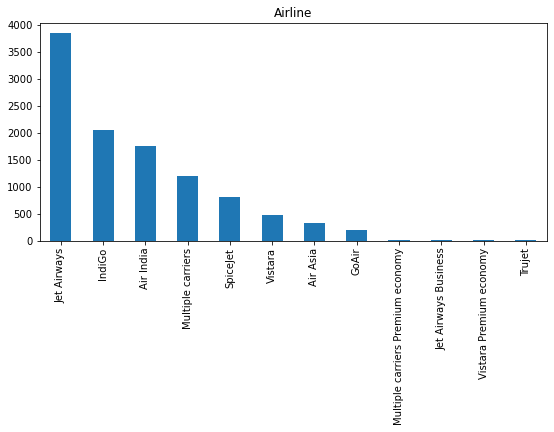

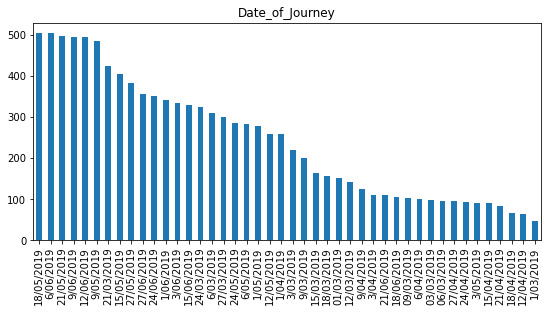

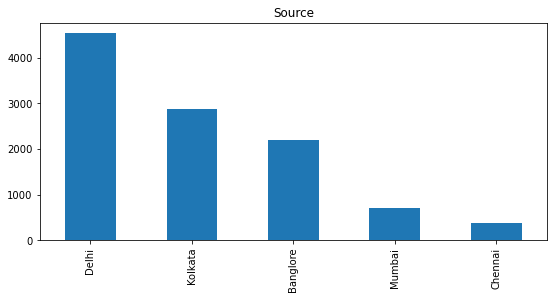

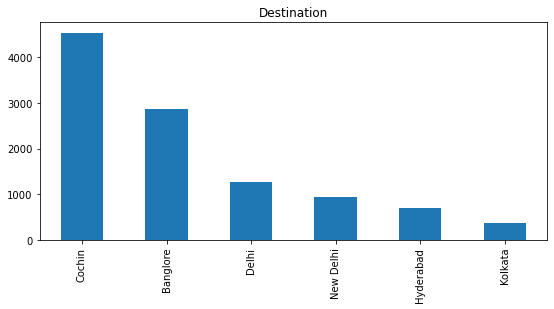

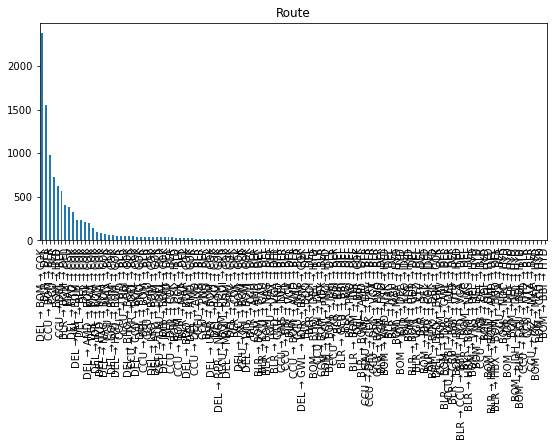

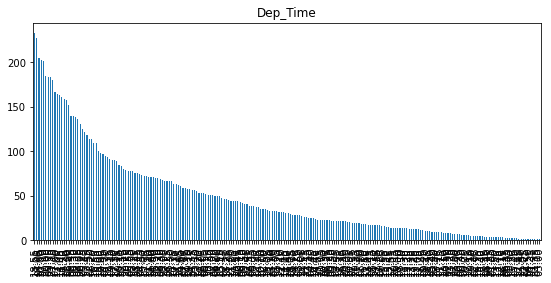

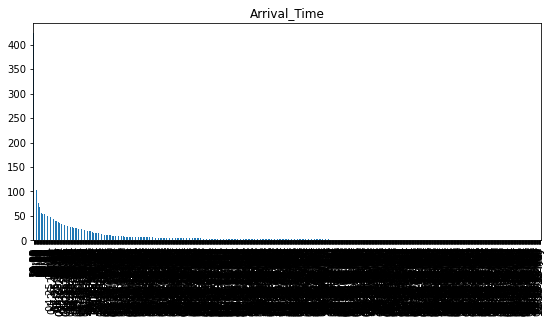

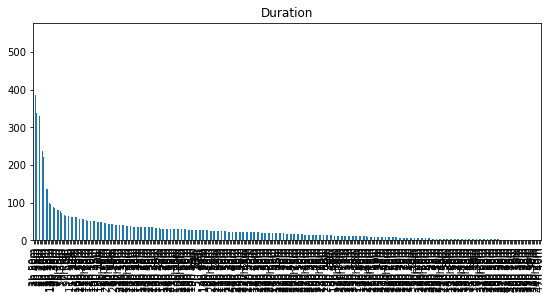

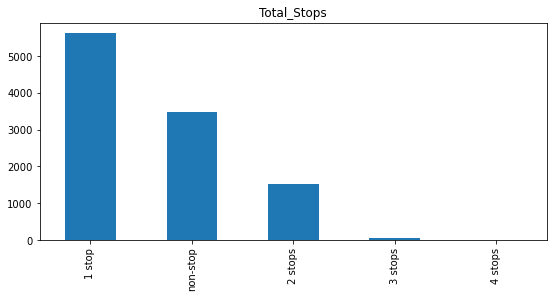

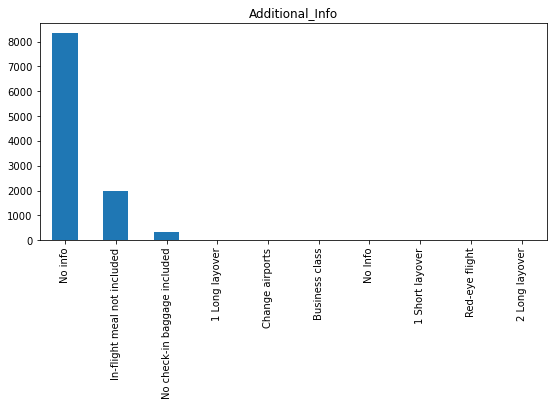

In [60]:
#  Bar graphic overview of dataset
# Selecting the categorical columns
categorical_col = df.select_dtypes(include=['object']).columns

# Plotting a bar chart for each of the categorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [61]:
# The most favourable: 
# airine is Jet Airways.
# source is Delhi.
# destination is Cochin

In [62]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

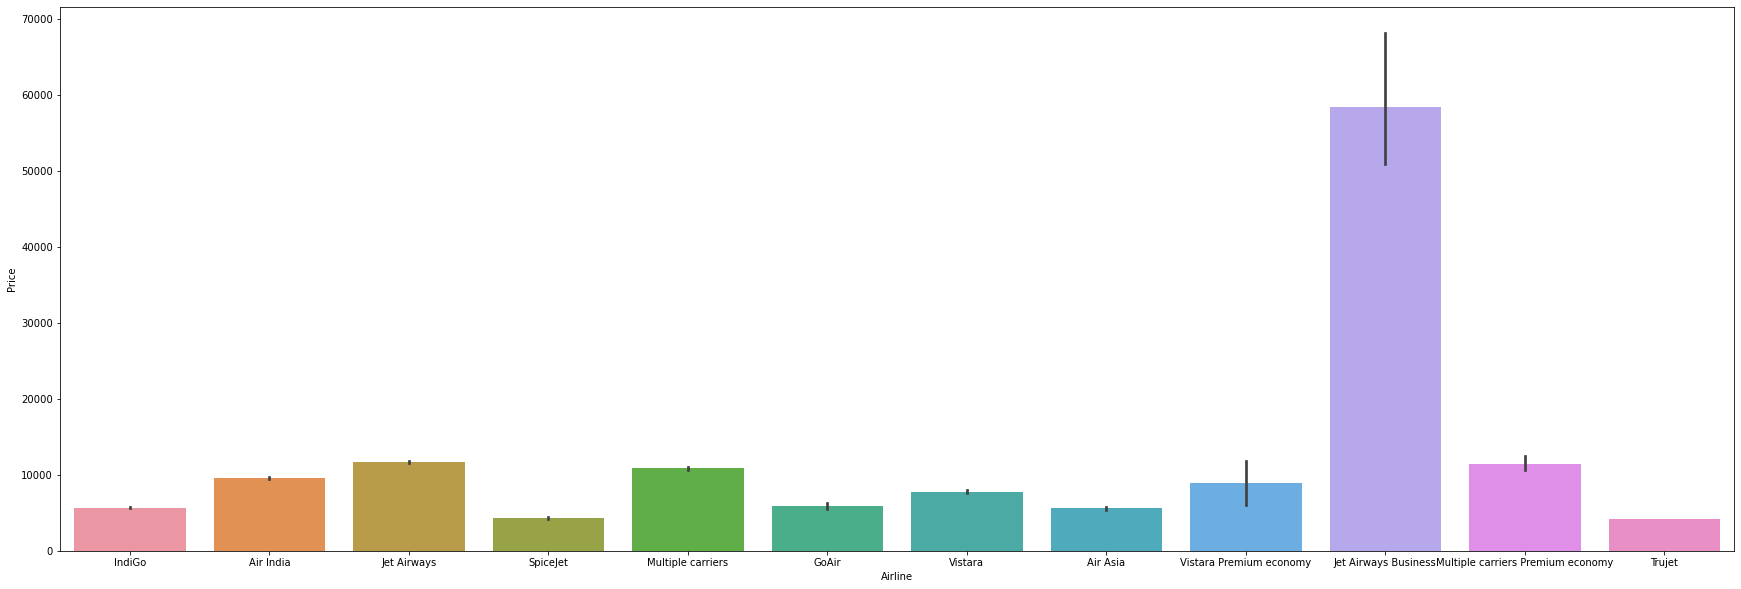

In [64]:
# See what connection is between Airline and Price
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=df)
plt.show()

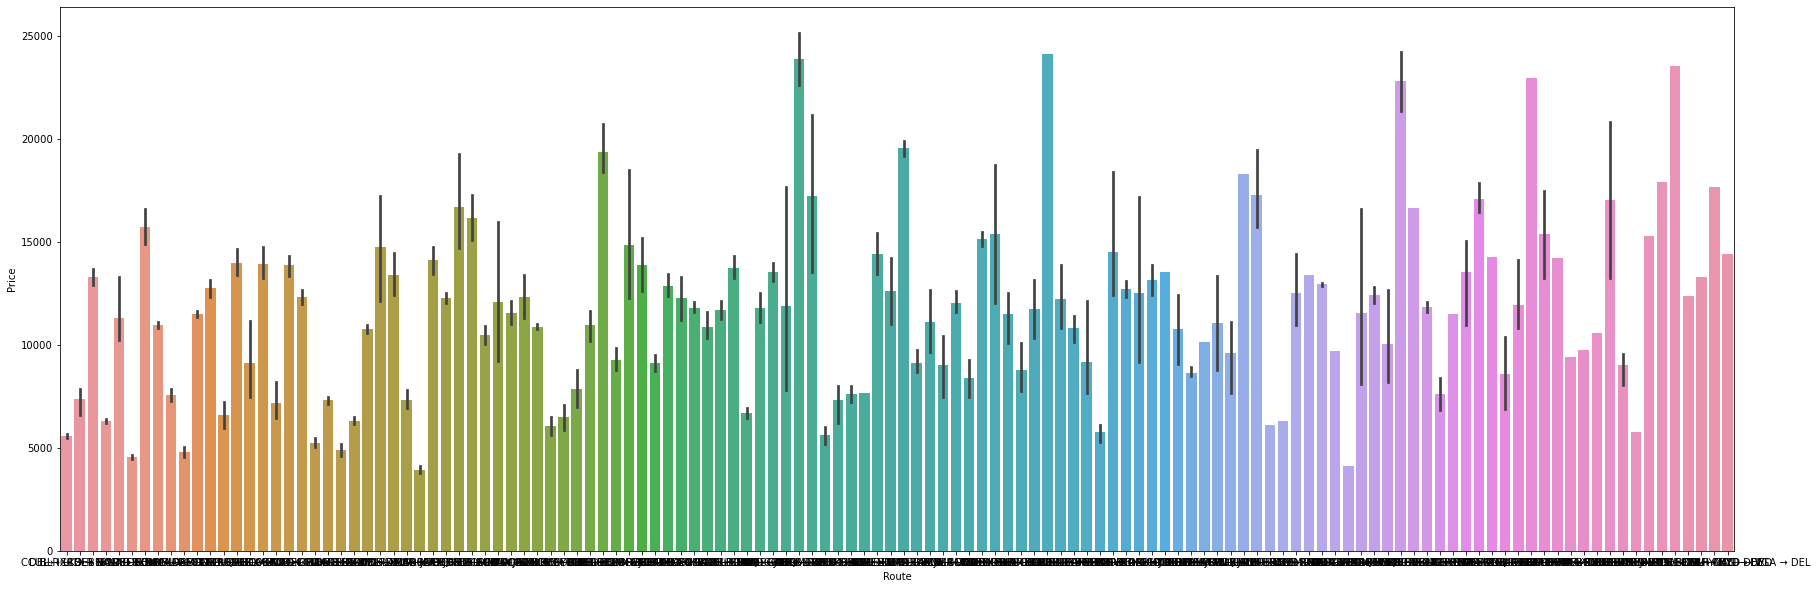

In [65]:
# See what connection is between Airline and Price
plt.figure(figsize=(30,10))
sns.barplot(x="Route",y='Price', data=df)
plt.show()

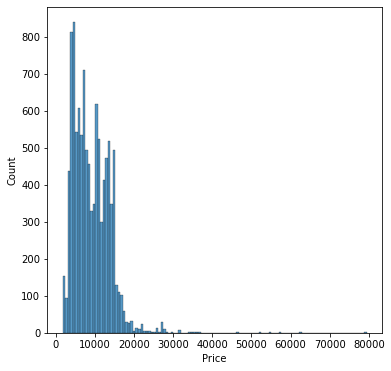

In [66]:
plt.figure(figsize=(6,6))
sns.histplot(df['Price'])
plt.show()

In [67]:
df['Price'].skew()

1.8125523782189141

In [68]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

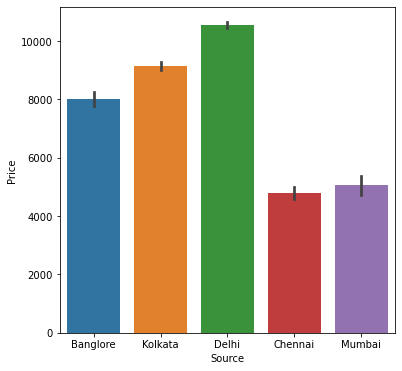

In [69]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y='Price', data=df)
plt.show()

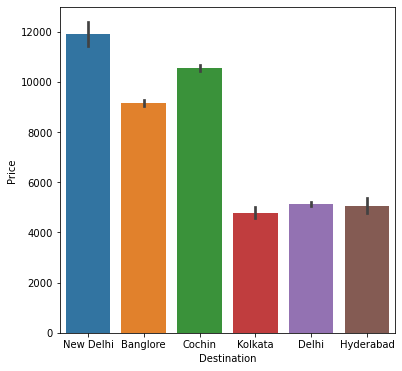

In [70]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y='Price', data=df)
plt.show()

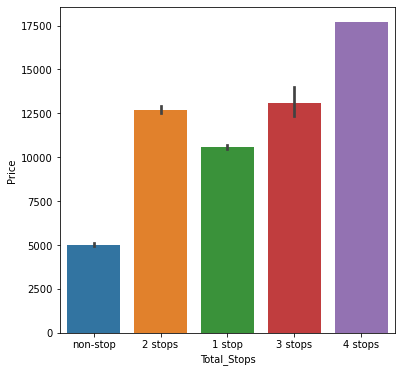

In [71]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y='Price', data=df)
plt.show()

In [72]:
#Dropping the NAN values
df.dropna(inplace = True)

In [73]:
# Duplicate values
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [74]:
# Removing duplicated values
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [75]:
df.shape

(10462, 11)

In [76]:
# No data in "Additional_Info" column.
df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [77]:
# Cheking for all types of airlines
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [78]:
# Cheking for all the Sources
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [79]:
# Checking for all the destinations
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [80]:
# Checking for all the routes
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

# Testing the dataset

In [81]:
# Data visualisation

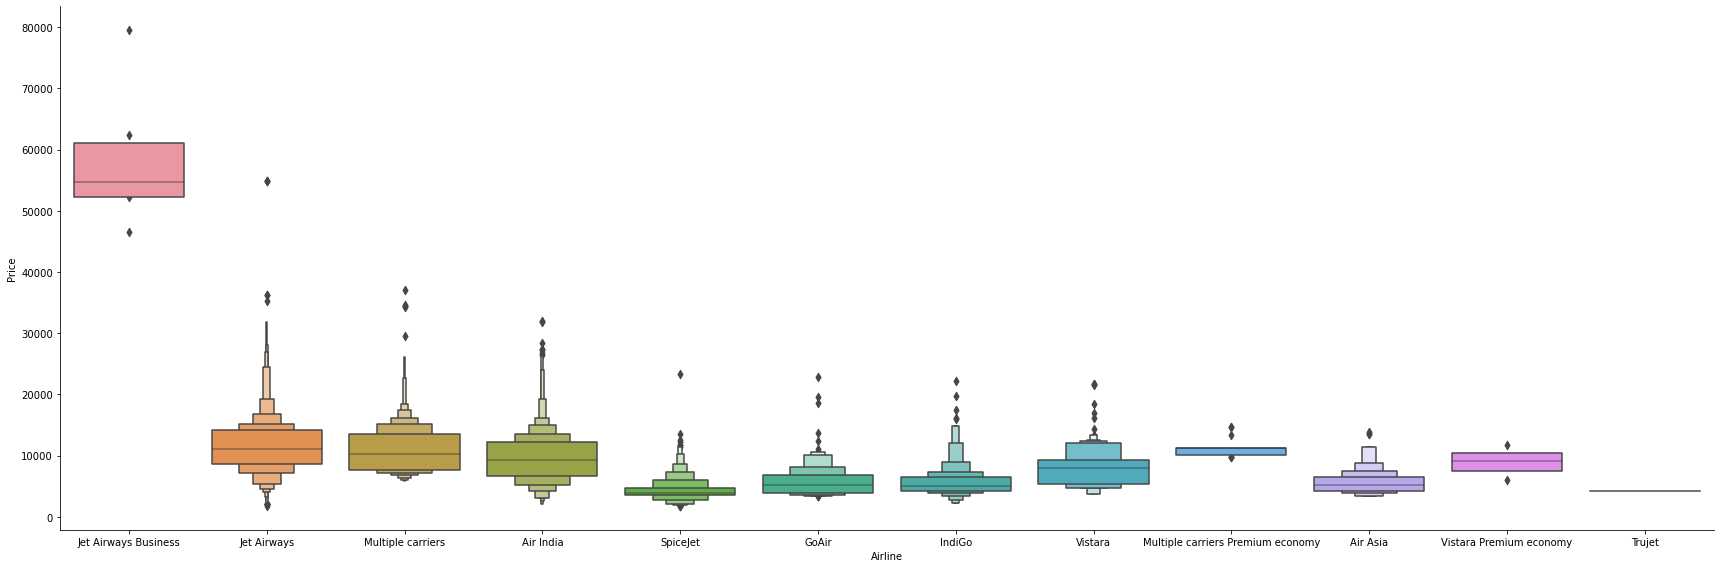

In [82]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

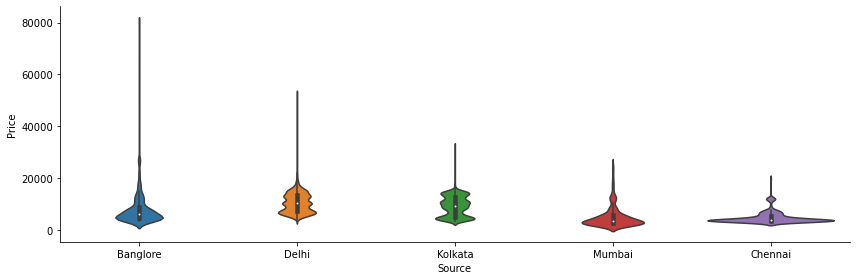

In [83]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

#### Plotting Box plot for Price vs Destination
##### Inference: Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

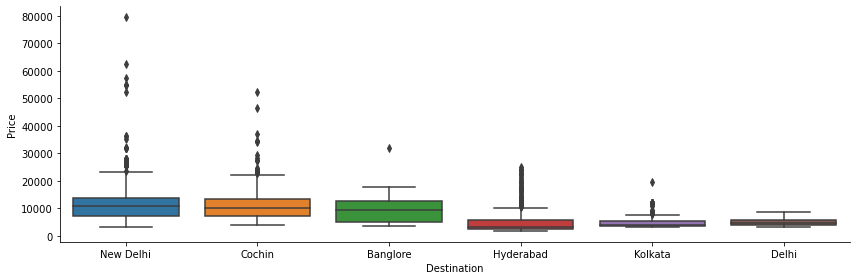

In [84]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [85]:
# Most outliers are in New Delhi


In [86]:
# Visualize the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Here first we are dividing the features and labels and then converting the hours in minutes.

In [87]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [88]:
df['Duration'] = df['Duration'].astype(str).str.replace('.', '')

C:\Users\amiet\AppData\Local\Temp/ipykernel_728/1921687906.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Duration'] = df['Duration'].astype(str).str.replace('.', '')


In [89]:
#Date_of_Journey: Here we are organizing the format of the date of journey in our dataset for better preprocessing in the model stage.

In [90]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df=df.drop(['Duration'],axis=1)

In [91]:
df.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [92]:
# As Source, Airline, Destination is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)


Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)


Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

In [93]:
# Concatenate dataframe --> fare + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [94]:
df=df.drop(['Airline','Source','Destination'],axis=1)

In [95]:
# Now after final preprocessing let’s see our dataset

In [96]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,1,No info,6218,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,1,No info,13302,4,45,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

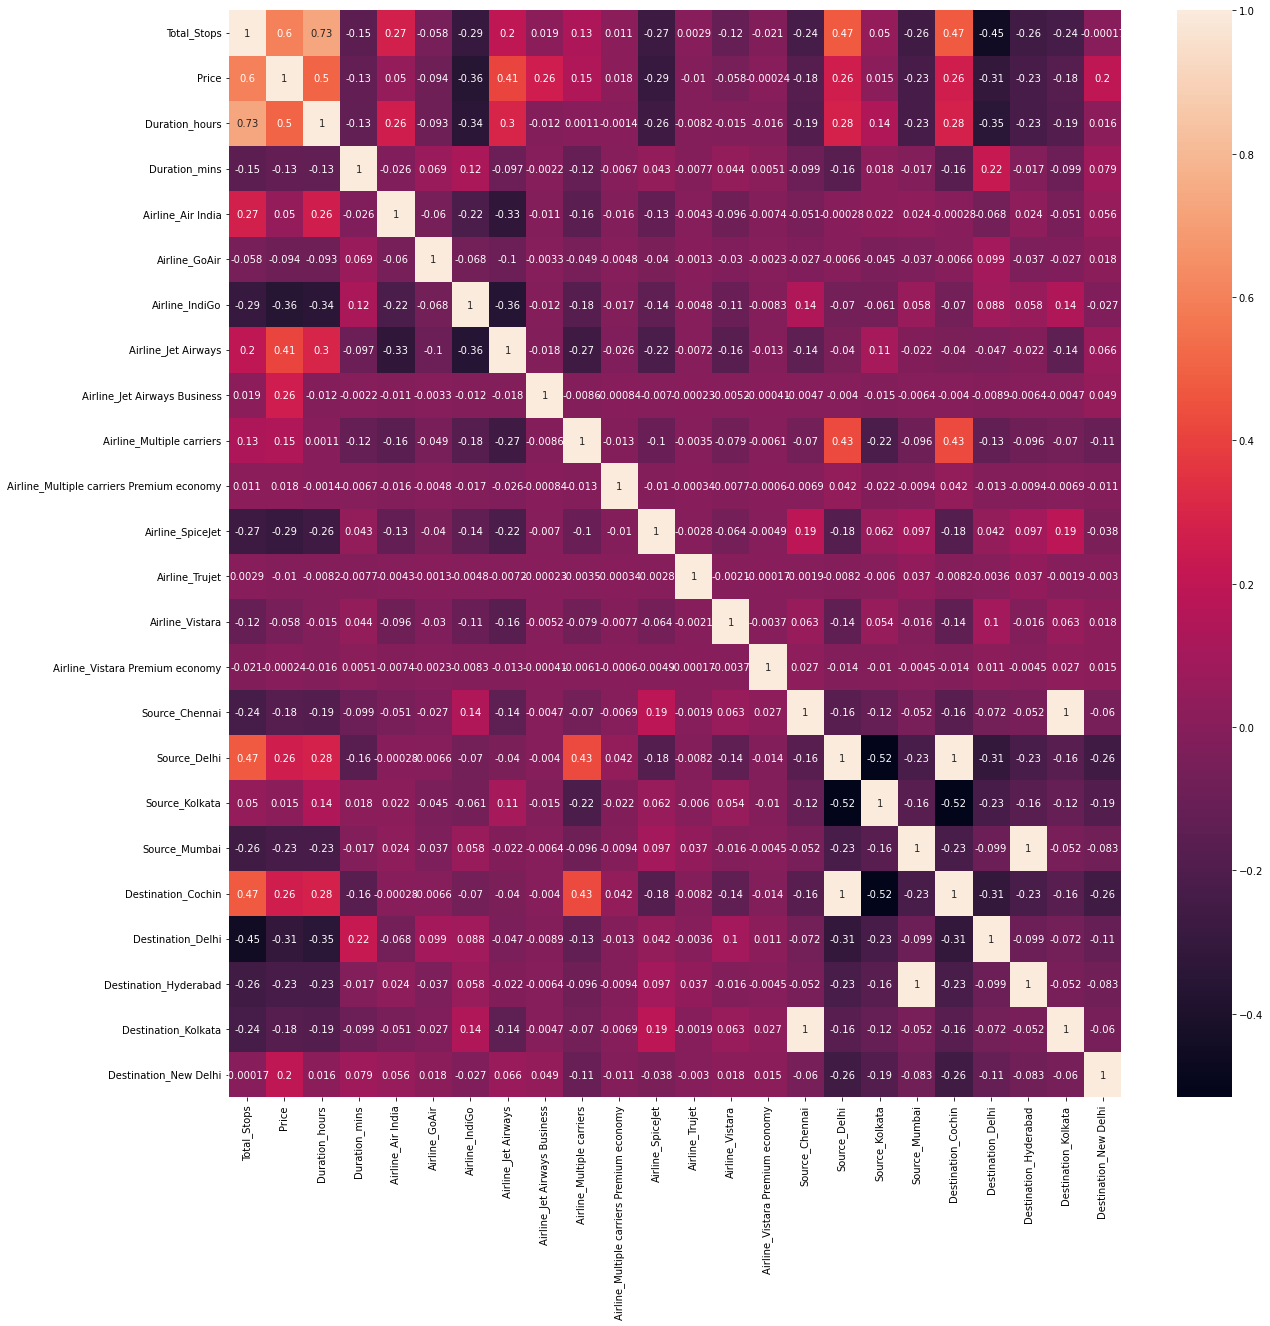

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [151]:
# Dropping the Price column as it is of no use

In [152]:
data = df.drop(["Price"], axis=1)

In [153]:
#Dealing with Categorical Data and Numerical Data

In [154]:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])


categorical_data.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,No info,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,No info,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,No info,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,No info,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#le = LabelEncoder()
categorical_data = categorical_data.apply(preprocessing.LabelEncoder().fit_transform)
#test_categorical_data = test_categorical_data.apply(preprocessing.LabelEncoder().fit_transform)
categorical_data.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,18,211,233,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,84,31,906,8,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,43,118,70,413,8,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,10,91,164,1324,8,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,29,149,1237,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
# Concatenating both Categorical Data and Numerical Data

In [157]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = df['Price']

X.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Duration_hours,Duration_mins
0,24,18,211,233,8,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2,50
1,6,84,31,906,8,1,0,0,0,0,...,1,0,0,0,0,0,0,2,7,25
2,43,118,70,413,8,0,0,0,1,0,...,0,0,1,0,0,0,0,2,19,0
3,10,91,164,1324,8,0,0,1,0,0,...,1,0,0,0,0,0,0,1,5,25
4,0,29,149,1237,8,0,0,1,0,0,...,0,0,0,0,0,0,1,1,4,45


In [158]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [159]:
import sklearn 

In [160]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [161]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#df_train_transformed = encoder.fit_transform(train_df)

In [162]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'Airline':['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet']})

#Original Data
data


,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,SpiceJet
4,Multiple carriers
5,GoAir
6,Vistara
7,Air Asia
8,Vistara Premium economy
9,Jet Airways Business


In [163]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

<12x12 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [164]:
#encode the data
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,0,0


In [166]:
encoder.fit_transform(data)

,intercept,Airline_0,Airline_1,Airline_2,Airline_3,Airline_4,Airline_5,Airline_6,Airline_7,Airline_8,Airline_9,Airline_10
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
print(selection.feature_importances_)

[1.40251352e-01 3.08690497e-02 2.63148701e-02 4.21153299e-02
 8.52313311e-02 1.02267349e-02 2.41534094e-03 1.42660011e-02
 1.33702219e-01 6.61819180e-02 1.95359366e-02 8.31843794e-04
 3.25048980e-03 7.99008544e-05 4.28315896e-03 1.56089929e-04
 3.26384375e-04 8.17032106e-03 3.39231145e-03 7.16848321e-03
 9.91263281e-03 1.28327010e-02 5.61359558e-03 3.50690961e-04
 1.60240235e-02 2.09722248e-01 1.23170490e-01 2.36045514e-02]


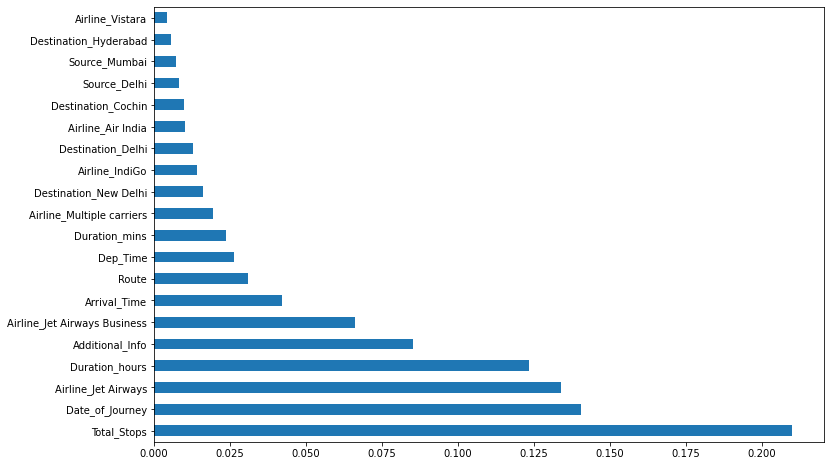

In [168]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [169]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = df.select_dtypes(include=['int64', 'float','int32'])
train_categorical_data.head()

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,SpiceJet
4,Multiple carriers


In [170]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [172]:
df.shape

(10462, 29)

In [174]:
df.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [176]:
X = df.loc[:, ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,1,No info,6218,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,1,No info,13302,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
y = df.iloc[:, 1]
y.head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [178]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = df['Price']

X.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Duration_hours,Duration_mins
0,24,18,211,233,8,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2,50
1,6,84,31,906,8,1,0,0,0,0,...,1,0,0,0,0,0,0,2,7,25
2,43,118,70,413,8,0,0,0,1,0,...,0,0,1,0,0,0,0,2,19,0
3,10,91,164,1324,8,0,0,1,0,0,...,1,0,0,0,0,0,0,1,5,25
4,0,29,149,1237,8,0,0,1,0,0,...,0,0,0,0,0,0,1,1,4,45


# Fitting model using Random Forest¶

In [179]:
# Checking all important feature using ExtraTreesRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date_of_Journey                            10462 non-null  object
 1   Route                                      10462 non-null  object
 2   Dep_Time                                   10462 non-null  object
 3   Arrival_Time                               10462 non-null  object
 4   Total_Stops                                10462 non-null  int64 
 5   Additional_Info                            10462 non-null  object
 6   Price                                      10462 non-null  int64 
 7   Duration_hours                             10462 non-null  int64 
 8   Duration_mins                              10462 non-null  int64 
 9   Airline_Air India                          10462 non-null  uint8 
 10  Airline_GoAir                     

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [183]:
# Scaling Data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
# Spiltting the Train data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)  

RandomForestRegressor(random_state=0)

In [186]:
# Using Random Forest Regressor 

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [187]:
# Predicting the X_test

y_pred = reg_rf.predict(X_test)

In [188]:
reg_rf.score(X_train, y_train)

0.9795281786550516

In [189]:
reg_rf.score(X_test, y_test)

0.8845996537205608

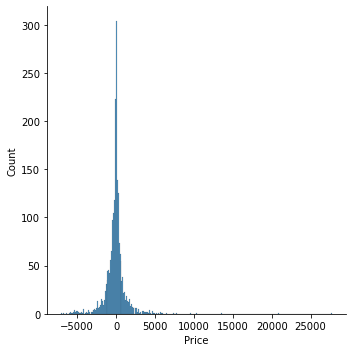

In [190]:
sns.displot(y_test-y_pred)
plt.show()

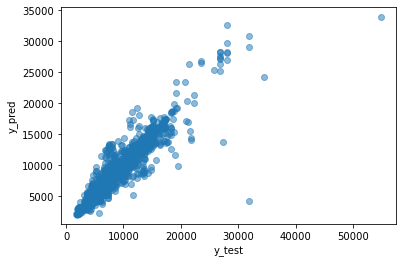

In [191]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()